In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns



In [198]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [199]:
df=pd.read_csv('/Users/angelis/Downloads/kc_house_data.csv')

In [200]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [202]:
# Datacleaning By Check if there is duplications 
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

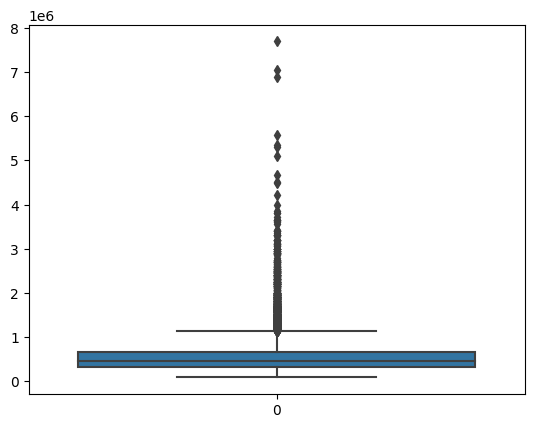

In [203]:
#From here Cleaning data by using boxplot to illustrate the distrubution of variables 
#Drop datas that are unreasonable.
sns.boxplot(df.price)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

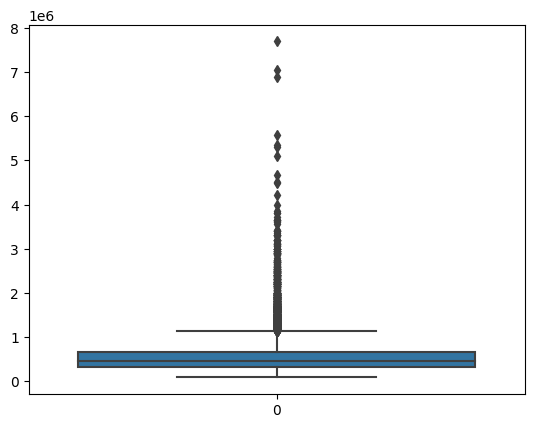

In [205]:
# using boxplot to illustrate the distrubution of price. 
# Not droping outliers of price is because  those outliers may still represent valid data points. Removing outliers could lead to loss of valuable information,
sns.boxplot(df.price)

<Axes: >

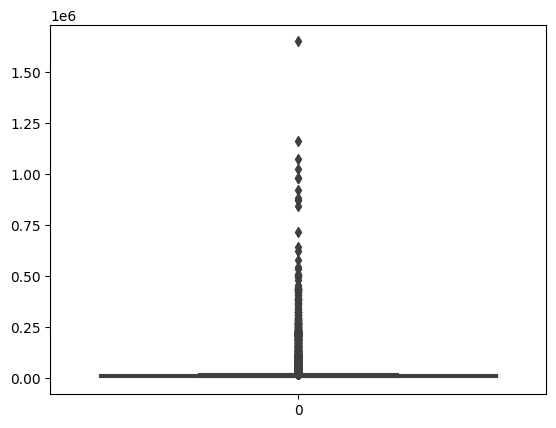

In [206]:
sns.boxplot(df.sqft_lot)

In [207]:
# Cleaning data by droping sqft_lot that over 60000
df = df.drop(df[df['sqft_lot'] > 60000].index)

<Axes: >

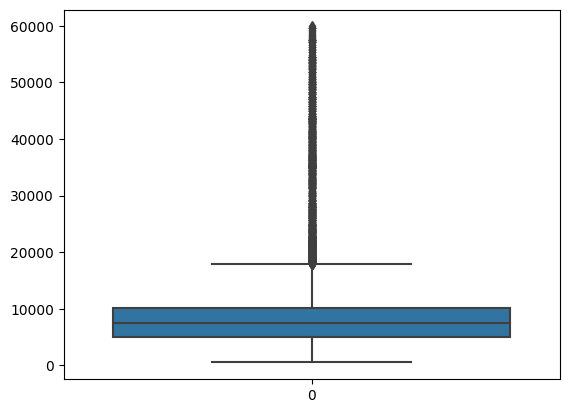

In [208]:
sns.boxplot(df.sqft_lot)

<Axes: >

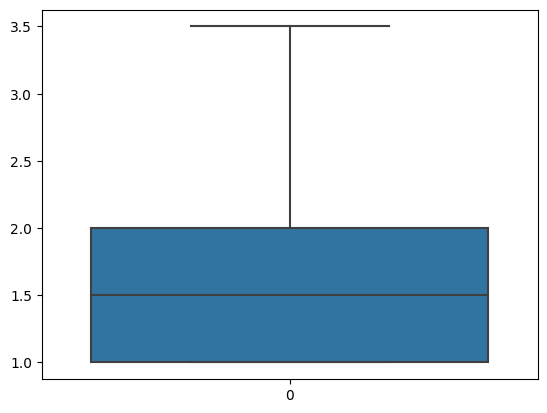

In [209]:
#using boxplot to illustrate the distrubution of floors.
sns.boxplot(df.floors)

<Axes: >

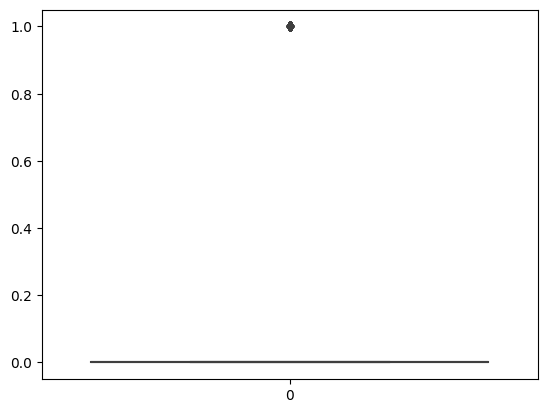

In [210]:
# using boxplot to illustrate the distrubution of waterfrount.All data are reasonable 
sns.boxplot(df.waterfront)

<Axes: >

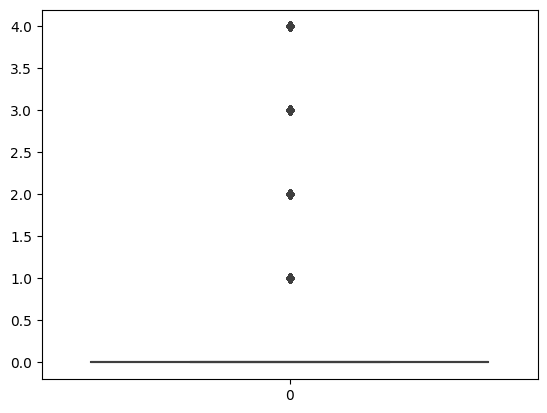

In [211]:
# using boxplot to illustrate the distrubution of view.All data are reasonable 

sns.boxplot(df.view)

<Axes: >

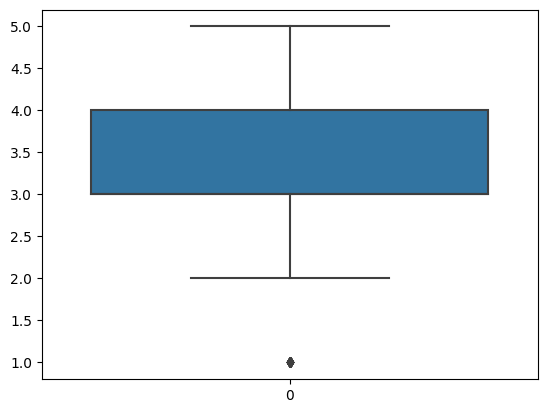

In [212]:
# using boxplot to illustrate the distrubution of condition. 
All data are reasonable 

sns.boxplot(df.condition)

<Axes: >

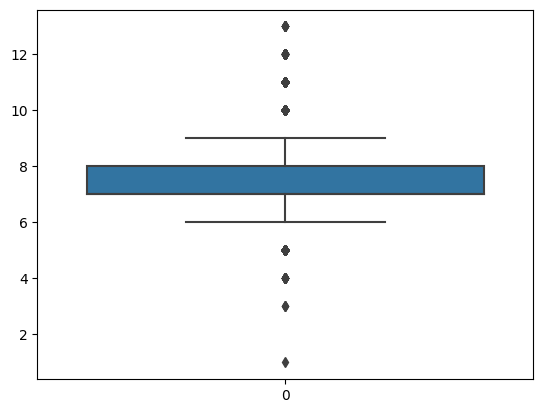

In [213]:
## using boxplot to illustrate the distrubution of grade.All data are reasonable 

sns.boxplot(df.grade)

<Axes: >

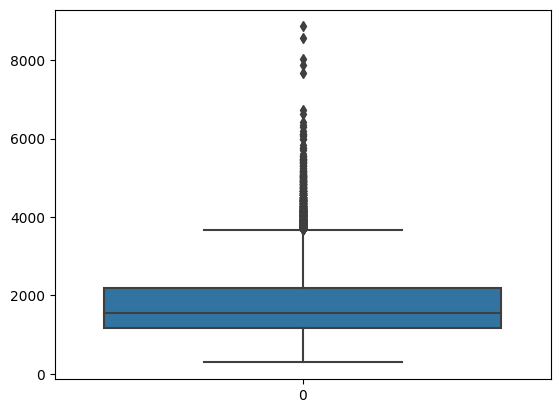

In [214]:
# # Not droping outliers of price is because  those outliers may still represent valid data points. Removing outliers could lead to loss of valuable information,

sns.boxplot(df.sqft_above)

<Axes: >

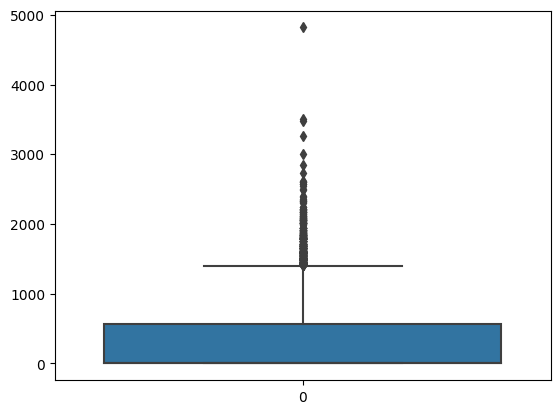

In [215]:
sns.boxplot(df.sqft_basement)

<Axes: >

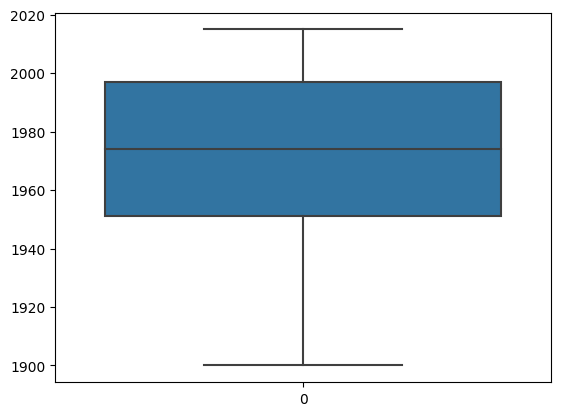

In [216]:
# using boxplot to illustrate the distrubution of yr_built.All data are reasonable 

sns.boxplot(df.yr_built)

<Axes: >

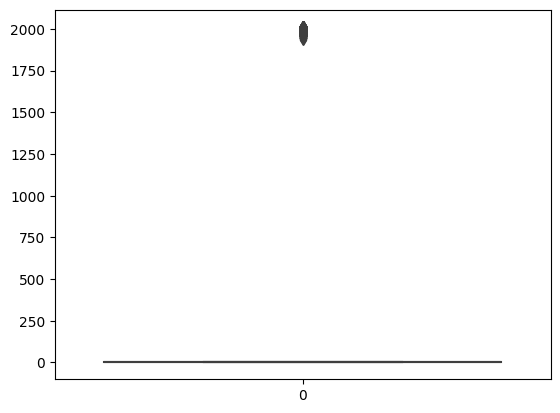

In [217]:
## using boxplot to illustrate the distrubution of yr_built.All data are reasonable 

sns.boxplot(df.yr_renovated)

<Axes: >

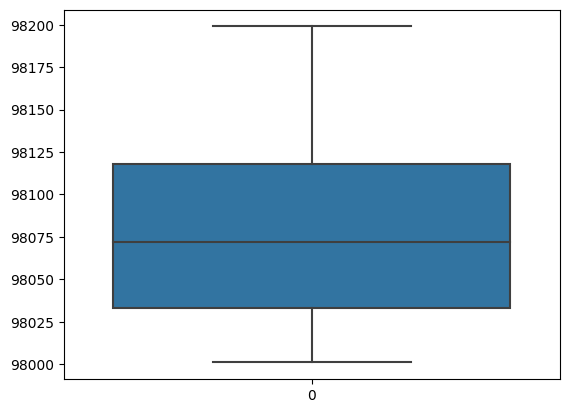

In [218]:
# using boxplot to illustrate the distrubution of zipcode.All data are reasonable 

sns.boxplot(df.zipcode)

<Axes: >

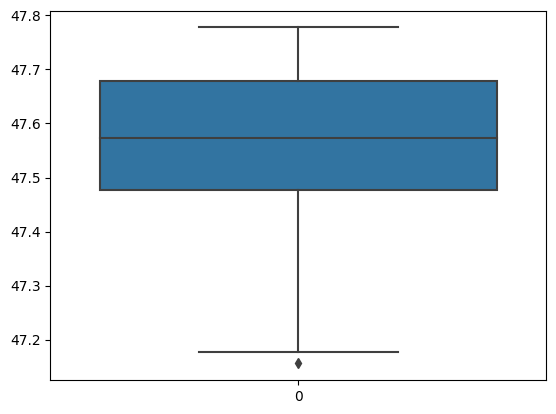

In [219]:
# using boxplot to illustrate the distrubution of lat.All data are reasonable 

sns.boxplot(df.lat)

<Axes: >

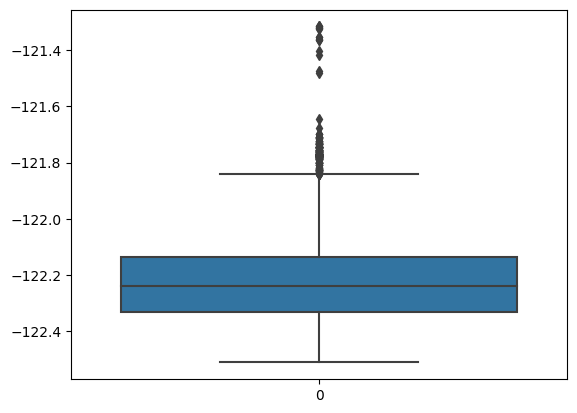

In [220]:
# using boxplot to illustrate the distrubution of long.All data are reasonable 

sns.boxplot(df.long)

<Axes: >

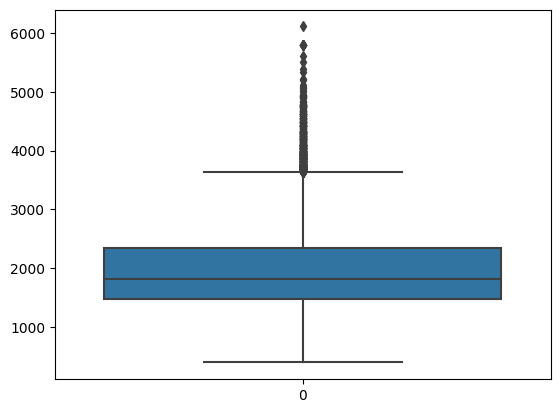

In [221]:
## using boxplot to illustrate the distrubution of sqft_living15.All data are reasonable, all data fall into 3 z-score of the t test 

sns.boxplot(df.sqft_living15)

<Axes: >

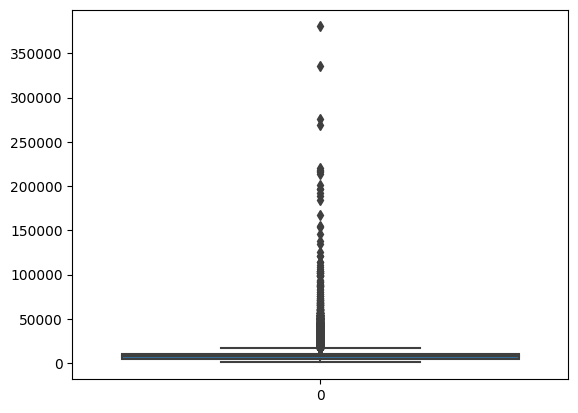

In [222]:
## using boxplot to illustrate the distrubution of sqft_lot15.
sns.boxplot(df.sqft_lot15)

In [223]:
#cleaning data by droping sqft_lot15 larger by 150000
df = df.drop(df[df['sqft_lot15'] > 150000].index)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20877 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20877 non-null  int64  
 1   date           20877 non-null  object 
 2   price          20877 non-null  float64
 3   bedrooms       20877 non-null  int64  
 4   bathrooms      20877 non-null  float64
 5   sqft_living    20877 non-null  int64  
 6   sqft_lot       20877 non-null  int64  
 7   floors         20877 non-null  float64
 8   waterfront     20877 non-null  int64  
 9   view           20877 non-null  int64  
 10  condition      20877 non-null  int64  
 11  grade          20877 non-null  int64  
 12  sqft_above     20877 non-null  int64  
 13  sqft_basement  20877 non-null  int64  
 14  yr_built       20877 non-null  int64  
 15  yr_renovated   20877 non-null  int64  
 16  zipcode        20877 non-null  int64  
 17  lat            20877 non-null  float64
 18  long       

In [225]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [226]:
#Creating dummies variables for variable view by creating view_0,view_1, view_2, view_3, view_4
#By using descriptive column names, the subsequent analysis becomes more intuitive and easier to interpret. It allows us to understand the impact of each level of the 'view' variable on the predicted house prices.
dummies_view = pd.get_dummies(df.view, dtype=int)

In [227]:
dummies_view.rename(columns = {1:'view_0', 2:'view_1', 3:'view_2', 4:'view_3', 5:'view_4'}, inplace = True)

In [228]:
df = pd.concat([df,dummies_view], axis=1)

In [229]:
##Creating dummies variables for variable view by creating condition_1,condition_2, condition_3, condition_4, condition_5

dummies_condition = pd.get_dummies(df.condition, dtype=int)

In [230]:
dummies_condition.rename(columns = {1:'condition_1', 2:'condition_2', 3:'condition_3', 4:'condition_4', 5:'condition_5'}, inplace = True)

In [231]:
df = pd.concat([df,dummies_condition], axis=1)

In [233]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,0,view_0,view_1,view_2,view_3,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [234]:
# This date conversion allows for easier manipulation and extraction of specific date components.
#Extracting year and month information from the 'date' column allows you to capture temporal patterns and trends. Houses might exhibit different price patterns based on the year or month they were sold. By including these features, you can potentially capture seasonality or other time-related effects in the analysis.
#Including the year and month as separate features provides additional interpretability to the model. You can analyze the coefficients associated with the 'year' and 'month' variables to understand how different time periods affect house prices.
# extracting year and month information as separate features through feature engineering allows you to capture temporal patterns, enhance interpretability, and potentially uncover insights related to seasonality or trends in house prices. 
# Transform datetime to a datetime data format
df['date'] = pd.to_datetime(df['date'])

In [235]:
df['year'] = df['date'].dt.year

In [236]:
df['month'] = df['date'].dt.month

In [237]:
df['day'] = df['date'].dt.day

In [238]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,view_2,view_3,condition_1,condition_2,condition_3,condition_4,condition_5,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,1,0,0,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,1,0,0,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,1,0,0,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,1,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,1,0,0,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,1,0,0,2014,5,21
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,0,0,0,1,0,0,2015,2,23
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,1,0,0,2014,6,23
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,1,0,0,2015,1,16


In [239]:
results = ols("price ~  bedrooms + bathrooms + sqft_living + floors + waterfront + view + condition +grade + sqft_lot +sqft_above + long + lat + sqft_basement + zipcode + yr_built + yr_renovated   ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3260.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:12:59   Log-Likelihood:            -2.8450e+05
No. Observations:               20877   AIC:                         5.690e+05
Df Residuals:                   20861   BIC:                         5.692e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.339e+07   2.93e+06      4.572

In [240]:
pred_vals = results.predict(df[['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot', 'floors' , 'waterfront' , 'view' , 'condition', 'grade' ,'sqft_above' , 'sqft_basement' , 'yr_built' , 'yr_renovated' , 'zipcode' , 'lat' , 'long' , 'sqft_living15' , 'sqft_lot15' , 'view_0' , 'view_1' , 'view_2' , 'view_3' , 'condition_1' , 'condition_2' , 'condition_3','condition_4','condition_5']])

In [241]:
pred_vals

0        211797.403923
1        745149.765803
2        344550.205270
3        458700.767913
4        450143.081133
             ...      
21608    479017.715533
21609    440588.129759
21610    147772.149958
21611    399866.478585
21612    150784.987035
Length: 20877, dtype: float64

In [242]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [243]:
res

,y_hat,price
0,211797.403923,221900.0
1,745149.765803,538000.0
2,344550.205270,180000.0
3,458700.767913,604000.0
4,450143.081133,510000.0
...,...,...
21608,479017.715533,360000.0
21609,440588.129759,400000.0
21610,147772.149958,402101.0
21611,399866.478585,400000.0


In [244]:
res['error'] = res['y_hat'] - res['price']

In [245]:
res.head(1)

,y_hat,price,error
0,211797.403923,221900.0,-10102.596077


In [246]:
res['sq_error'] = res['error']**2

In [247]:
np.sqrt(res['sq_error'].mean())

200445.62443149922

(array([3.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.500e+01, 7.400e+01,
        3.720e+02, 1.569e+04, 4.682e+03, 3.400e+01]),
 array([-4211170.40855285, -3670989.23123558, -3130808.05391831,
        -2590626.87660104, -2050445.69928377, -1510264.5219665 ,
         -970083.34464923,  -429902.16733196,   110279.00998531,
          650460.18730257,  1190641.36461984]),
 <BarContainer object of 10 artists>)

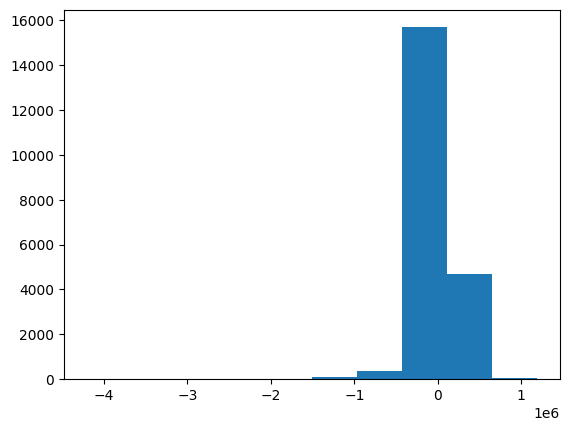

In [248]:
plt.hist(res['error'])

(array([1.8431e+04, 2.0280e+03, 2.9300e+02, 8.7000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

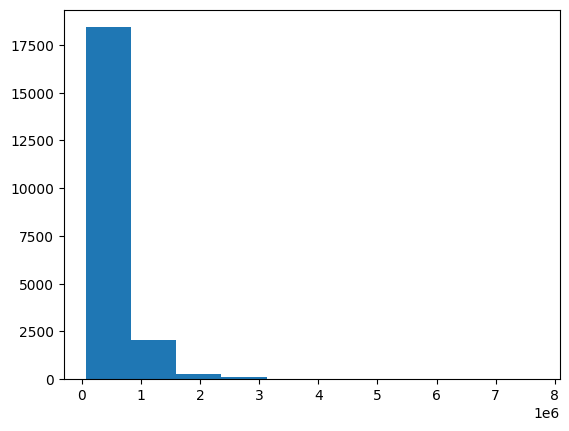

In [249]:
plt.hist(df['price'])

In [250]:
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,view_2,view_3,condition_1,condition_2,condition_3,condition_4,condition_5,year,month,day
count,2.087700e+04,20877,2.087700e+04,20877.000000,20877.000000,20877.000000,20877.000000,20877.00000,20877.000000,20877.000000,...,20877.000000,20877.000000,20877.000000,20877.000000,20877.000000,20877.000000,20877.000000,20877.000000,20877.000000,20877.000000
mean,4.659744e+09,2014-10-29 02:23:36.410403840,5.360980e+05,3.369593,2.104361,2055.339752,9502.707908,1.49351,0.007424,0.228242,...,0.022321,0.014657,0.001341,0.007329,0.648656,0.262969,0.079705,2014.322748,6.573837,15.686784
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,2.205700e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,4.000000,8.000000
50%,4.024102e+09,2014-10-16 00:00:00,4.494000e+05,3.000000,2.250000,1900.000000,7496.000000,1.50000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2014.000000,6.000000,16.000000
75%,7.399301e+09,2015-02-17 00:00:00,6.382500e+05,4.000000,2.500000,2520.000000,10165.000000,2.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2015.000000,9.000000,23.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,12050.000000,59863.000000,3.50000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,12.000000,31.000000
std,2.873773e+09,NaN,3.665598e+05,0.930838,0.762810,891.946405,8521.616981,0.54168,0.085847,0.756951,...,0.147730,0.120180,0.036599,0.085295,0.477401,0.440256,0.270842,0.467538,3.115068,8.632140


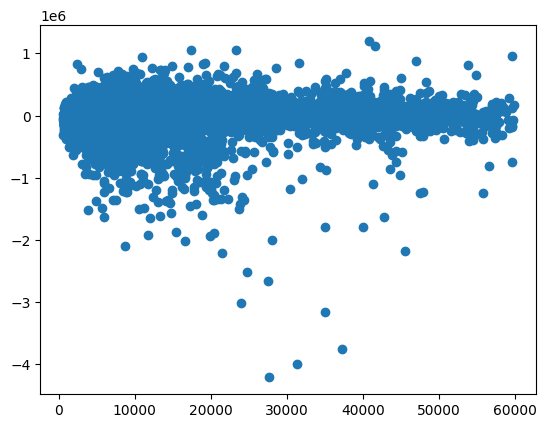

In [251]:
plt.scatter(df['sqft_lot'],res['error'])

((array([-3.98882335, -3.77318088, -3.65520468, ...,  3.65520468,
          3.77318088,  3.98882335]),
  array([-4211170.40855285, -3988399.57381785, -3756400.71820174, ...,
          1058874.3244176 ,  1121834.2637554 ,  1190641.36461984])),
 (179157.86703152678, -1.1629277112246231e-06, 0.8936336558331189))

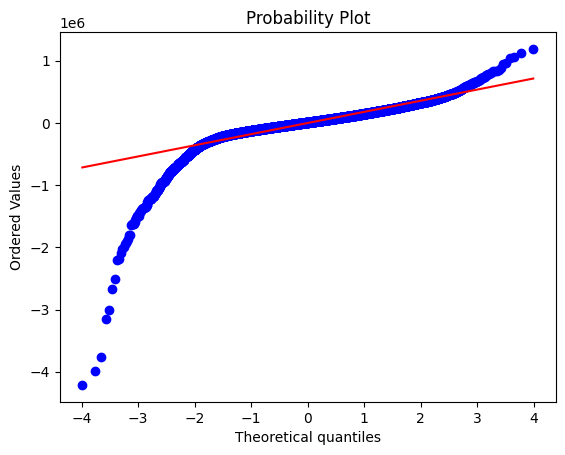

In [252]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20877 entries, 0 to 21612
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20877 non-null  int64         
 1   date           20877 non-null  datetime64[ns]
 2   price          20877 non-null  float64       
 3   bedrooms       20877 non-null  int64         
 4   bathrooms      20877 non-null  float64       
 5   sqft_living    20877 non-null  int64         
 6   sqft_lot       20877 non-null  int64         
 7   floors         20877 non-null  float64       
 8   waterfront     20877 non-null  int64         
 9   view           20877 non-null  int64         
 10  condition      20877 non-null  int64         
 11  grade          20877 non-null  int64         
 12  sqft_above     20877 non-null  int64         
 13  sqft_basement  20877 non-null  int64         
 14  yr_built       20877 non-null  int64         
 15  yr_renovated   20877 non

In [254]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [255]:
# separate features and target
categorical_features = ['waterfront','view', 'condition','grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','sqft_above','sqft_basement']
target = 'price'

In [256]:
df[['waterfront','view', 'condition','grade','bedrooms','bathrooms', 'sqft_living','sqft_lot','sqft_above','sqft_basement']]

,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,0,0,3,7,3,1.00,1180,5650,1180,0
1,0,0,3,7,3,2.25,2570,7242,2170,400
2,0,0,3,6,2,1.00,770,10000,770,0
3,0,0,5,7,4,3.00,1960,5000,1050,910
4,0,0,3,8,3,2.00,1680,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...
21608,0,0,3,8,3,2.50,1530,1131,1530,0
21609,0,0,3,8,4,2.50,2310,5813,2310,0
21610,0,0,3,7,2,0.75,1020,1350,1020,0
21611,0,0,3,8,3,2.50,1600,2388,1600,0


In [257]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [258]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [259]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [260]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [261]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement'])])),
                ('regressor', LinearRegression())])

In [262]:
pred = linear_regression.predict(X_test)

In [263]:
pred

array([ 339200.,  375296., 1878016., ...,  311296.,  272384.,  411648.])

In [264]:
from sklearn.metrics import mean_squared_error

In [265]:
np.sqrt(mean_squared_error(pred,y_test))

231832.38733414494

In [266]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [267]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement'])])),
                ('regressor', Ridge(alpha=3.0))])

In [268]:
pred_ridge = ridge_regression.predict(X_test)

In [269]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

233629.9901578816

In [270]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [271]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.079e+13, tolerance: 1.822e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement'])])),
                ('regressor', Lasso())])

In [272]:
lasso_pred = lasso_regression.predict(X_test)

In [273]:
np.sqrt(mean_squared_error(lasso_pred, y_test))


231892.5793309232

In [274]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [275]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [276]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [277]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

269967.3269613459

In [278]:
y_test

13575     279000.0
12595     350000.0
1754     1038000.0
17673     217500.0
16344     486000.0
           ...    
8679      895000.0
11599     850000.0
16085     449000.0
8171      285950.0
14692     369900.0
Name: price, Length: 6264, dtype: float64

In [279]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [280]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [281]:
X_test

,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
13575,0,0,3,7,3,1.00,1530,15975,970,560
12595,0,0,4,7,4,1.00,1510,7200,1510,0
1754,0,0,3,12,3,2.50,4570,10615,4570,0
17673,0,0,4,7,2,2.00,1070,8400,1070,0
16344,0,0,3,10,4,2.50,3560,12047,3560,0
...,...,...,...,...,...,...,...,...,...,...
8679,0,0,3,9,4,2.50,2850,8526,2850,0
11599,0,4,3,9,4,3.25,3090,6744,3090,0
16085,0,0,3,7,3,2.25,1960,44634,1130,830
8171,0,0,3,6,2,1.00,1170,6000,1170,0


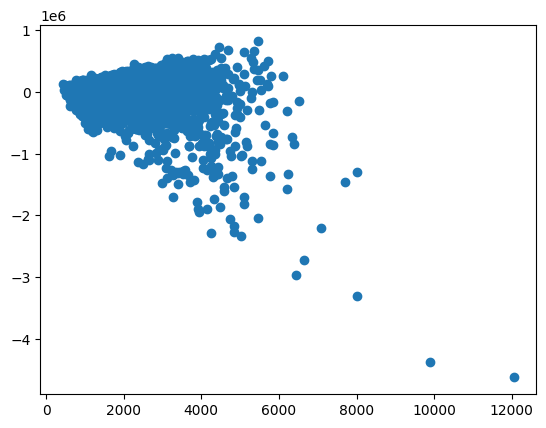

In [282]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sqft_living'],elastic_net_pred['res'])

By running OLS Regression, LASSO, RIDGE and ELASTIC Net,and using Q-Q Plot for OLS Regression, and using Mean Square Error technique to evaluate the models, the LASSO return the smallest value which is 231892.5793309232  it means that the LASSO model has the lowest value of the evaluation metric being used. The lower value of the evaluation metric suggests that the LASSO model might be the most suitable choice among the models considered for predicting the house price of King County. It indicates that the LASSO model has achieved a better balance between model complexity (sparsity) and predictive performance.

Explain the result to a business executive :
The model we developed explains about 70.1% of the variability in house prices. This means that the independent variables included in the model, such as the number of bedrooms, bathrooms, square footage of living area, etc., collectively contribute to understanding and predicting house prices.
The model is statistically significant, indicating that the relationship between the independent variables and house prices is meaningful and not due to chance. The associated F-statistic, which tests the overall significance of the model, is quite high.

Mean drivers of house prices in King city are 
Bedrooms
bathrooms
sqft_liv
sqft_lot
floors
waterfront
view
condition
grade
sqft_basmt
zipcode
lat
long 

THese drivers impact the price by 
Bedrooms 1.339e+07
bathrooms  -3.794e+04
sqft_liv   3.867e+04
sqft_lot   122.7654
floors     -1250.7786
waterfront  6.069e+05
view       5.485e+04
condition  2.599e+04
grade      1.002e+05
sqft_basmt -1.7931
zipcode    80.7459
lat
long 